In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
from os.path import exists, join, basename, splitext

import random
import PIL
import torchvision
import cv2
import numpy as np
import torch
torch.set_grad_enabled(False)
  
import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

In [ ]:
!gdown --id 1mk-5RIZ5ZxjqECrSuhX60scE2WQSa86n

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1mk-5RIZ5ZxjqECrSuhX60scE2WQSa86n
To: /content/DFPE.zip
100% 568k/568k [00:00<00:00, 147MB/s]


In [ ]:
!unzip /content/DFPE.zip

Archive:  /content/DFPE.zip
  inflating: pH = 10.jpg             
  inflating: pH = 11.jpg             
  inflating: pH = 12.jpg             
  inflating: pH = 2.jpg              
  inflating: pH = 3.jpg              
  inflating: pH = 4.jpg              
  inflating: pH = 5.jpg              
  inflating: pH = 6.jpg              
  inflating: pH = 7.jpg              
  inflating: pH = 8.jpg              
  inflating: pH = 9.jpg              


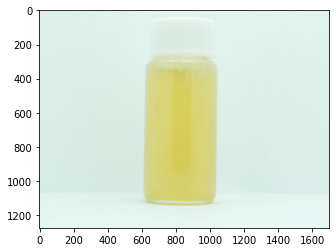

In [ ]:
image_file = '/content/pH = 12.jpg'
plt.imshow(matplotlib.image.imread(image_file))

In [ ]:
model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
model = model.eval().cuda()

In [ ]:
t = time.time()
image = PIL.Image.open(image_file)
image_tensor = torchvision.transforms.functional.to_tensor(image).cuda()

print(image_tensor)

output = model([image_tensor])[0]
print('executed in %.3fs' % (time.time() - t))

tensor([[[0.8745, 0.8745, 0.8745,  ..., 0.8902, 0.8902, 0.8902],
         [0.8745, 0.8745, 0.8745,  ..., 0.8902, 0.8902, 0.8902],
         [0.8745, 0.8745, 0.8745,  ..., 0.8863, 0.8863, 0.8863],
         ...,
         [0.8941, 0.8941, 0.8941,  ..., 0.9098, 0.9098, 0.9098],
         [0.8941, 0.8941, 0.8941,  ..., 0.9098, 0.9098, 0.9098],
         [0.8941, 0.8941, 0.8941,  ..., 0.9098, 0.9098, 0.9098]],

        [[0.9412, 0.9412, 0.9412,  ..., 0.9569, 0.9569, 0.9569],
         [0.9412, 0.9412, 0.9412,  ..., 0.9569, 0.9569, 0.9569],
         [0.9412, 0.9412, 0.9412,  ..., 0.9529, 0.9529, 0.9529],
         ...,
         [0.9569, 0.9569, 0.9569,  ..., 0.9686, 0.9686, 0.9686],
         [0.9569, 0.9569, 0.9569,  ..., 0.9686, 0.9686, 0.9686],
         [0.9569, 0.9569, 0.9569,  ..., 0.9686, 0.9686, 0.9686]],

        [[0.9176, 0.9176, 0.9176,  ..., 0.9333, 0.9333, 0.9333],
         [0.9176, 0.9176, 0.9176,  ..., 0.9333, 0.9333, 0.9333],
         [0.9176, 0.9176, 0.9176,  ..., 0.9294, 0.9294, 0.

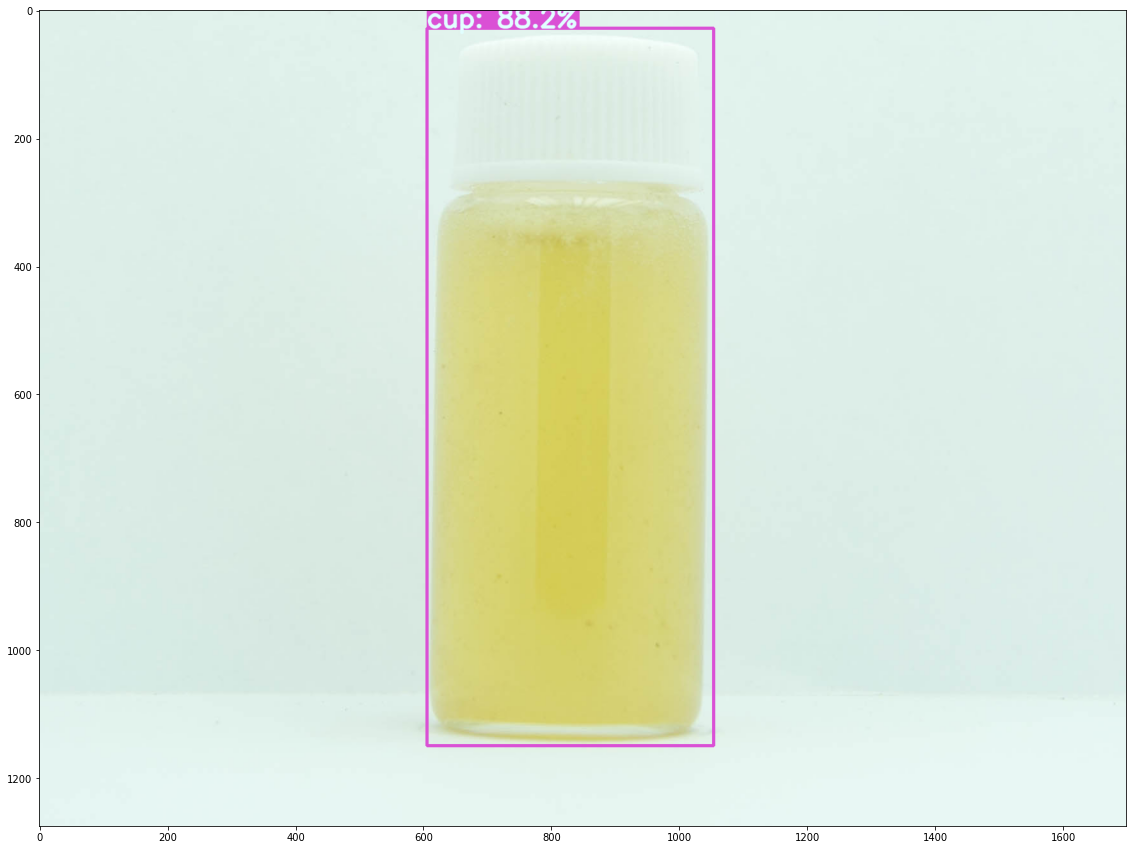

In [ ]:
coco_names = ['unlabeled', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'street sign', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack', 'umbrella', 'shoe', 'eye glasses', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'plate', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk', 'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'blender', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
colors = [[random.randint(0, 255) for _ in range(3)] for _ in coco_names]

result_image = np.array(image.copy())
for box, label, score in zip(output['boxes'], output['labels'], output['scores']):
  if score > 0.5:
    color = random.choice(colors)
    
    # draw box
    tl = round(0.002 * max(result_image.shape[0:2])) + 1  # line thickness
    c1, c2 = (int(box[0]), int(box[1])), (int(box[2]), int(box[3]))

    # print(c1, c2)
    
    cv2.rectangle(result_image, c1, c2, color, thickness=tl)
    # draw text
    display_txt = "%s: %.1f%%" % (coco_names[label], 100*score)
    tf = max(tl - 1, 1)  # font thickness
    t_size = cv2.getTextSize(display_txt, 0, fontScale=tl / 3, thickness=tf)[0]
    c2_text = c1[0] + t_size[0], c1[1] - t_size[1] - 3
    cv2.rectangle(result_image, c1, c2_text, color, -1)  # filled
    cv2.putText(result_image, display_txt, (c1[0], c1[1] - 2), 0, tl / 3, [225, 255, 255], thickness=tf, lineType=cv2.LINE_AA)
  
plt.figure(figsize=(20, 15))
plt.imshow(result_image)

In [ ]:
print(c1)

(606, 28)


In [ ]:
print(c2)

(1054, 1149)


In [ ]:
print(box[0])

tensor(598.7546, device='cuda:0')


In [ ]:
# print((c2[0]+c1[0])/2)

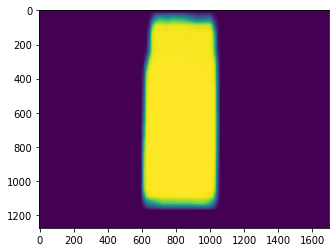

In [ ]:
masks = None
for score, mask in zip(output['scores'], output['masks']):
  if score > 0.5:
    if masks is None:
      masks = mask
    else:
      masks = torch.max(masks, mask)

plt.imshow(masks.squeeze(0).cpu().numpy())

In [ ]:
print(type(image))

<class 'PIL.JpegImagePlugin.JpegImageFile'>


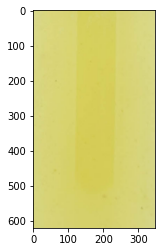

In [ ]:
# Importing Image class from PIL module
from PIL import Image
 
 
# Size of the image in pixels (size of original image)
# (This is not mandatory)
width, height = image.size
 
# Setting the points for cropped image
left = c1[0] + 50
top = c1[1] + 400
right = c2[0] - 50
bottom = c2[1] - 100
 
# Cropped image of above dimension
# (It will not change original image)
img_crop = image.crop((left, top, right, bottom))
 
# Shows the image in image viewer
plt.imshow(img_crop)

In [ ]:
img_crop.save("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_DFPE/DFPE_detect_img/image_crop_ph12.jpg")